# Análisis de Canales de Twitch mediante Clustering (KMeans)

En este cuadernillo se analiza el dataset `Twitch_global_data.csv` utilizando técnicas de aprendizaje no supervisado, específicamente el algoritmo de clustering KMeans.  
El objetivo principal es **agrupar canales de Twitch en clusters** basados en características relevantes (como year, Month, Hours_watched, Avg_viewers, Peak_viewers, Streams, Avg_channels, Games_streamed, Viewer_ratio) para **identificar perfiles o segmentos automáticos** dentro del conjunto de canales.

Durante el proceso, se realiza un preprocesamiento cuidadoso de los datos, se determina el número óptimo de clusters utilizando Silhouette Score y se analizan los perfiles principales de cada grupo generado automáticamente.

---


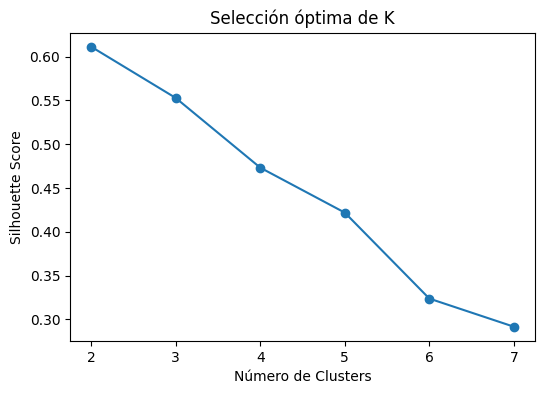

Mejor número de clusters según Silhouette Score: 2
Resumen de clusters:
         Hours_watched   Avg_viewers  Peak_viewers       Streams  \
cluster                                                            
0         6.833277e+08  9.376021e+05  2.079788e+06  1.106570e+07   
1         1.830502e+09  2.509266e+06  4.974591e+06  2.231181e+07   

         Avg_channels  Viewer_ratio  
cluster                              
0        34392.400000     26.816000  
1        96847.563636     26.351273  

Cantidad de elementos por cluster:
cluster
1    55
0    50
Name: count, dtype: int64


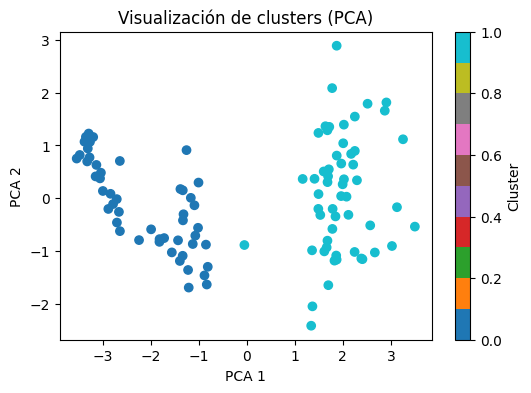

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('Twitch_global_data.csv')

# 2. Seleccionar variables numéricas relevantes
cols = [
    'Hours_watched',
    'Avg_viewers',
    'Peak_viewers',
    'Streams',
    'Avg_channels',
    'Viewer_ratio'
]
# Algunas columnas pueden no estar, ajusta según tu archivo
cols = [col for col in cols if col in df.columns]
df_num = df[cols].dropna()

# 3. Normalizar/Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 4. Elegir el número óptimo de clusters con Silhouette Score
silhouette_scores = []
K = range(2, 8)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=64)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Mostrar gráfica de Silhouette Score vs número de clusters
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Selección óptima de K')
plt.show()

# 5. Elegir el mejor K
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Mejor número de clusters según Silhouette Score: {best_k}')

# 6. Aplicar MiniBatchKMeans con el mejor K
kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=64)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 7. Analizar clusters: medias por cluster
summary = df.groupby('cluster')[cols].mean()
print("Resumen de clusters:")
print(summary)
print("\nCantidad de elementos por cluster:")
print(df['cluster'].value_counts())

# 8. (Opcional) Visualización 2D de clusters (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters (PCA)')
plt.colorbar(label='Cluster')
plt.show()


---
### Conclusión

A través de la aplicación de KMeans y la evaluación con Silhouette Score, se identificaron agrupaciones naturales en el dataset de canales de Twitch.  
Cada cluster representa un segmento diferente según sus características principales.  
Este análisis es útil para comprender la diversidad de canales, identificar outliers, o segmentar estrategias de promoción y crecimiento en Twitch.
